In [3]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import xarray as xr
import rioxarray as rioxr

## 3. True color image

In [4]:
fp = os.path.join('data','landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(fp)

In [5]:
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

In [6]:
# Drop the band dimension from the data
landsat = landsat.squeeze("band", drop=True)

In [7]:
# Confirm that the band dimension was dropped
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


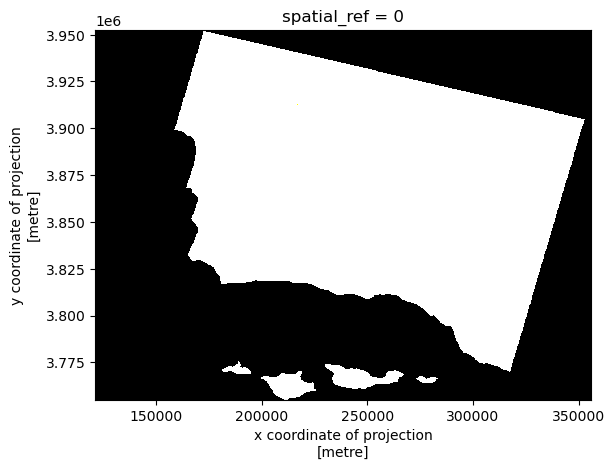

In [8]:
# Select the red, green, and blue variables (in that order),
# convert it to a numpy.array
# and then plot
landsat[['red','green','blue']].to_array().plot.imshow()

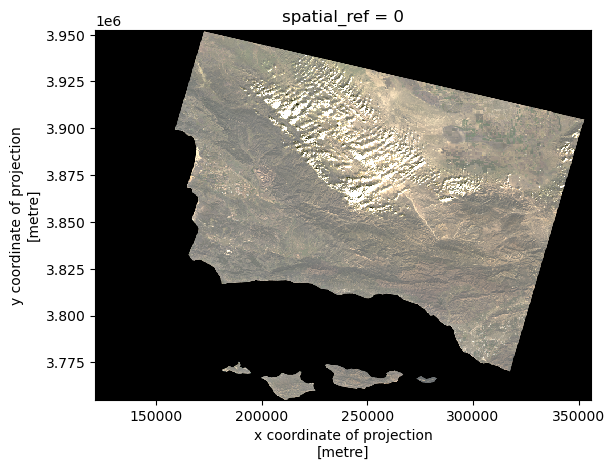

In [9]:
# Use robust parameter to update scale for the plot
landsat[['red','green','blue']].to_array().plot.imshow(robust=True)

## 4. False color image

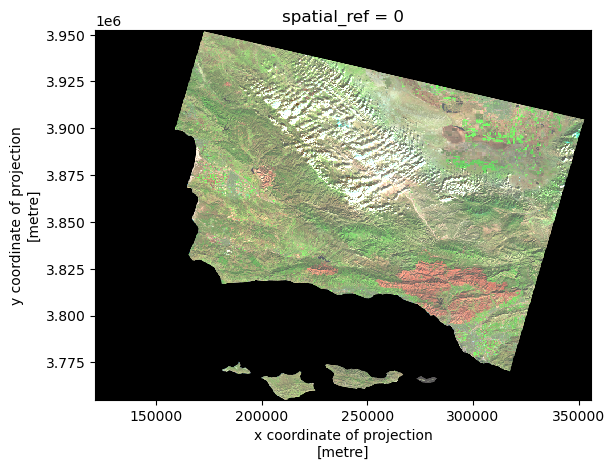

In [10]:
# Plot SWIR22, NIR, and red variables (in that order) to create a false color image
landsat[['swir22','nir08','red']].to_array().plot.imshow(robust=True)

## 5. Map

In [12]:
# Read in thomas_boundary in this notebook from data folder
thomas_boundary = gpd.read_file('data/Thomas_Fire_boundary.shp')

In [13]:
# Make sure that the thomas fire boundary and the landsat data are the same CRS
thomas_boundary = thomas_boundary.to_crs(landsat.rio.crs)
landsat.rio.crs == thomas_boundary.crs

True

<function matplotlib.pyplot.show(close=None, block=None)>

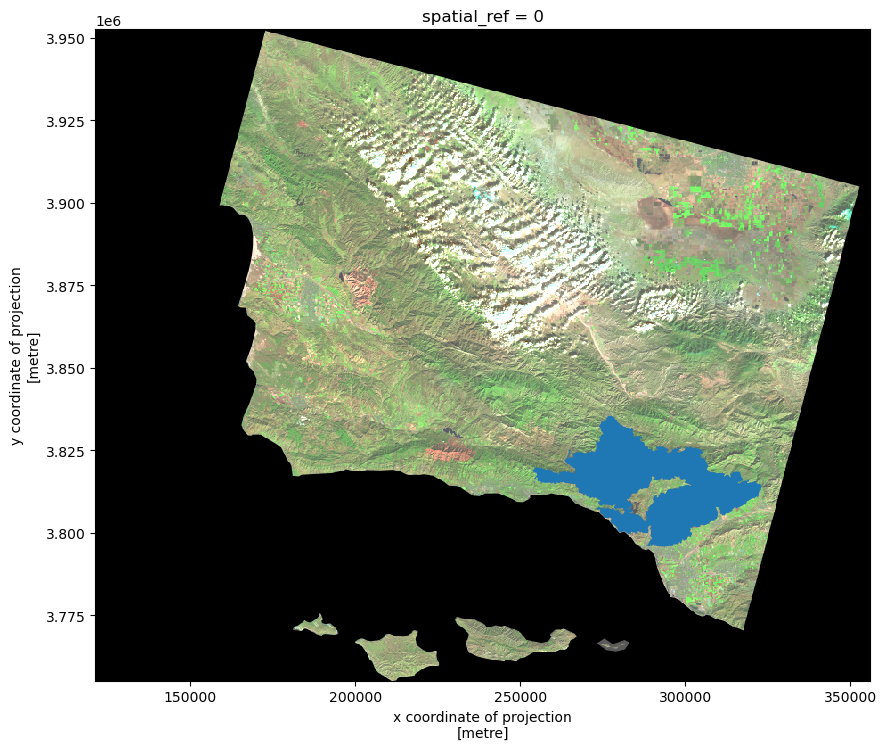

In [14]:
# Create a map with the false color image (like the one above) and the Thomas Fire perimeter
fig, ax = plt.subplots(figsize=(10,10))

landsat[['swir22','nir08','red']].to_array().plot.imshow(ax=ax, robust=True)

thomas_boundary.plot(ax=ax)

plt.show